<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Deep%20Learning%20Course/Convolutional_Neural_Network_for_Classification_of_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Author and Instructor of this Notebook is **Shivam Modi**.

## LinkedIn: https://www.linkedin.com/in/shivam-modi-datascientist/

# Import necessary packages

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
import numpy as np

# Loading dataset 

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

# Scaling the train and test dataset

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

# Creating and Training a Convolutional Neural Network

In [ ]:
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_neural_network.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 66s 34ms/step - loss: 0.2177 - accuracy: 0.9338
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0790 - accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0590 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0362 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0294 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0252 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 60s 32m

# Evaluating the CNN model

In [ ]:
convolutional_neural_network.evaluate(X_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.0577 - accuracy: 0.9866


[0.057720739394426346, 0.9865999817848206]

# Making Predictions

In [ ]:
y_predicted_by_model = convolutional_neural_network.predict(X_test)
y_predicted_by_model[0]   #getting probability score for each class digits

313/313 [==============================] - 4s 10ms/step


array([4.4057309e-09, 1.8401603e-05, 1.8334414e-06, 6.6529843e-08,
       4.9295275e-09, 2.7345002e-09, 4.4810266e-14, 9.9997950e-01,
       1.9209226e-08, 2.0404295e-07], dtype=float32)

In [ ]:
np.argmax(y_predicted_by_model[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

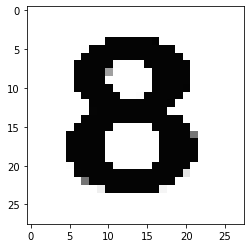

In [ ]:
y=cv2.imread("8.jpg")   
y1=cv2.resize(y,(28,28))               
plt.imshow(y1)

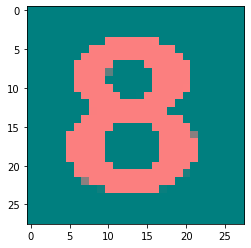

In [ ]:
temp = cv2.cvtColor(y1,cv2.COLOR_BGR2YCrCb)  #since its a three channel image i hav econverted into this so rbg are represented in the luminance one 
temp=255-temp                                #negative image
plt.imshow(temp)

In [ ]:
print(temp.shape)

(28, 28, 3)


In [ ]:
Y = np.zeros((temp.shape[0], temp.shape[1],1), dtype=float)    #array of (28,28,1)
Y[:,:,0] = temp[:, :,0].astype(float) / 255           #fitting the data of temp image in that zeros and normalizing it
yh= convolutional_neural_network.predict(Y.reshape(1,28,28,1))       #finally the value of image

1/1 [==============================] - 0s 27ms/step


In [ ]:
yh

array([[8.1798218e-13, 2.6256754e-18, 2.0550575e-09, 1.7666840e-09,
        1.4737374e-16, 4.9829663e-12, 2.5842014e-16, 8.5425900e-17,
        1.0000000e+00, 7.3433490e-12]], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in yh]
y_predicted_labels

[8]

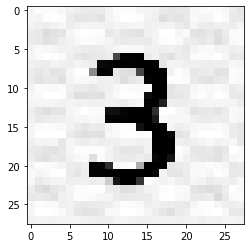

In [ ]:
y=cv2.imread("3.jpg")   
y1=cv2.resize(y,(28,28))               
plt.imshow(y1)

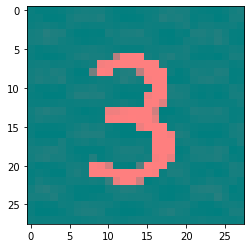

In [ ]:
temp = cv2.cvtColor(y1,cv2.COLOR_BGR2YCrCb)  #since its a three channel image i hav econverted into this so rbg are represented in the luminance one 
temp=255-temp                                #negative image
plt.imshow(temp)

In [ ]:
print(temp.shape)

(28, 28, 3)


In [ ]:
Y = np.zeros((temp.shape[0], temp.shape[1],1), dtype=float)    #array of (28,28,1)
Y[:,:,0] = temp[:, :,0].astype(float) / 255           #fitting the data of temp image in that zeros and normalizing it
yh= convolutional_neural_network.predict(Y.reshape(1,28,28,1)) 

1/1 [==============================] - 0s 45ms/step


In [ ]:
yh

array([[1.0764149e-15, 2.1536351e-08, 4.9522575e-10, 9.9999702e-01,
        2.2249585e-12, 2.9317498e-06, 1.0289580e-14, 1.2677259e-09,
        2.7912214e-10, 3.2952830e-08]], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in yh]
y_predicted_labels

[3]